# Working with Excel files

In [2]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Excel file

In [4]:
# Read Excel file
data = pd.ExcelFile('files/Obes-phys-acti-diet-eng-2014-tab.xls')

# Print existing Excel sheet names
print(data.sheet_names)

['Chapter 7', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '7.10']


## Cleanup Excel file data

In [5]:
# Skip first 4 rows and last 14 rows, u-string = unicode
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

# Rename unnamed to year, inplace=True modifies existing object
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

# Drop empty rows with NaN
data_age.dropna(inplace=True)

# Set index to Year
data_age.set_index('Year', inplace=True)

print('After cleanup: ')
print(data_age)

After cleanup: 
           Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74   
Year                                                                       
2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0  \
2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0

## Plot graph

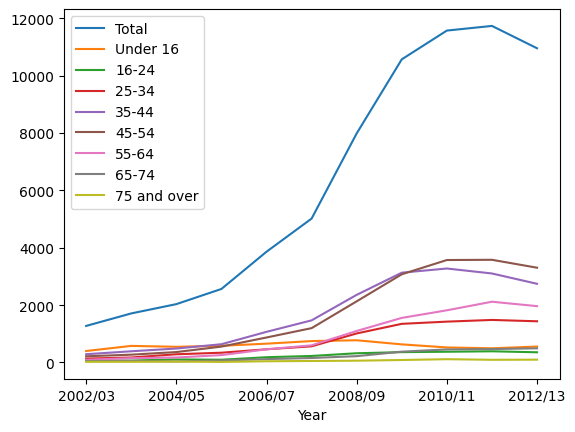

In [6]:
data_age.plot()
plt.show()

## Drop total column and plot

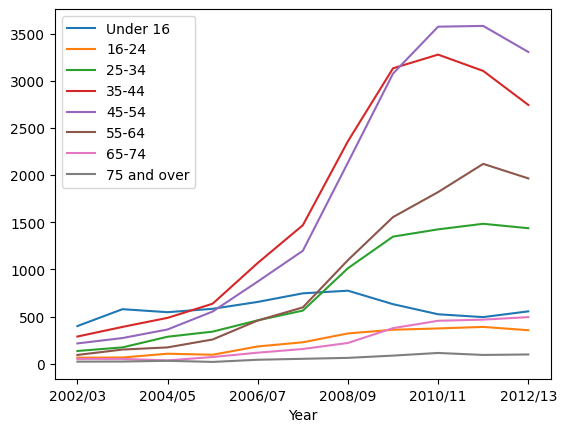

In [7]:
data_age_without_total = data_age.drop('Total', axis=1)
data_age_without_total.plot()
plt.show()

## Plot children vs adults

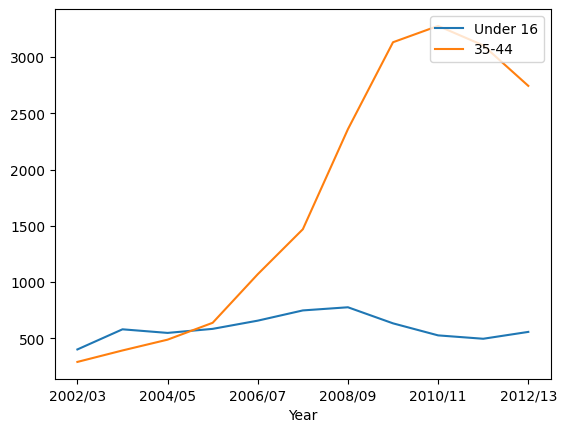

In [8]:
data_age['Under 16'].plot(label='Under 16')
data_age['35-44'].plot(label='35-44')
plt.legend(loc='upper right')
plt.show()

## Try extrapolating graph using curve fitting and polynomial interpolation

### Polynomial degree of 3

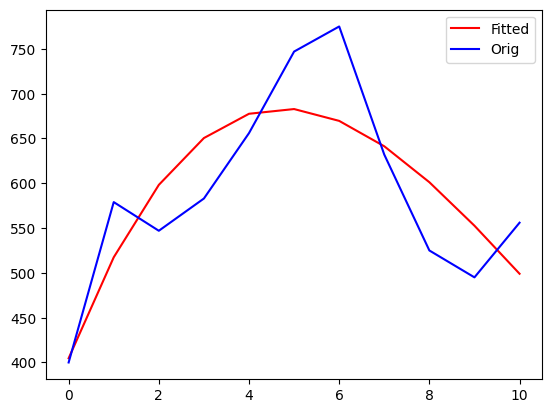

In [9]:
kids_values = data_age['Under 16'].values
# x-axis of 1 to 10
x_axis = range(len(kids_values))
# Polynomial degree
poly_degree = 3
# Generate curve fitting graph
curve_fit = np.polyfit(x_axis, kids_values, poly_degree)
# Generate curve fitting graph values (10 points)
poly_interp = np.poly1d(curve_fit)

poly_fit_values = []

for i in range(len(x_axis)):
    poly_fit_values.append(poly_interp(i))

# Plot and compare original data with curve fitting data
plt.plot(x_axis, poly_fit_values, '-r', label='Fitted')
plt.plot(x_axis, kids_values, '-b', label='Orig')
plt.legend(loc='upper right')
plt.show()

### Polynomial degree of 5

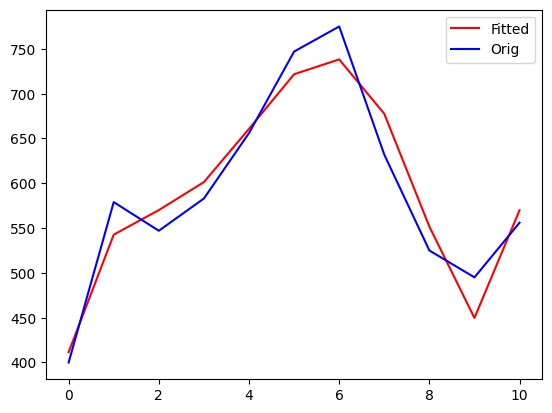

In [10]:
kids_values = data_age['Under 16'].values
# x-axis of 1 to 10
x_axis = range(len(kids_values))
# Polynomial degree
poly_degree = 5
# Generate curve fitting graph
curve_fit = np.polyfit(x_axis, kids_values, poly_degree)
# Generate curve fitting graph values (10 points)
poly_interp = np.poly1d(curve_fit)

poly_fit_values = []

for i in range(len(x_axis)):
    poly_fit_values.append(poly_interp(i))

# Plot and compare original data with curve fitting data
plt.plot(x_axis, poly_fit_values, '-r', label='Fitted')
plt.plot(x_axis, kids_values, '-b', label='Orig')
plt.legend(loc='upper right')
plt.show()

### Polynomial degree of 7

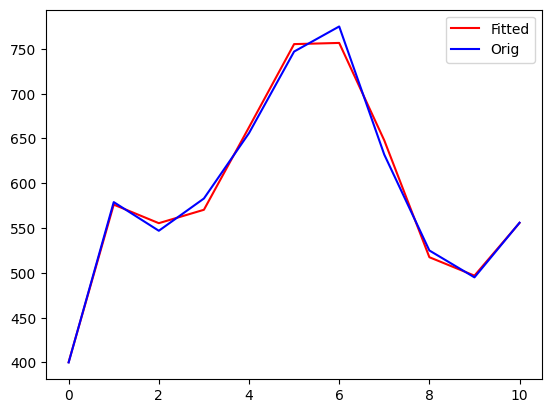

In [13]:
kids_values = data_age['Under 16'].values
# x-axis of 1 to 10
x_axis = range(len(kids_values))
# Polynomial degree
poly_degree = 7
# Generate curve fitting graph
curve_fit = np.polyfit(x_axis, kids_values, poly_degree)
# Generate curve fitting graph values (10 points)
poly_interp = np.poly1d(curve_fit)

poly_fit_values = []

for i in range(len(x_axis)):
    poly_fit_values.append(poly_interp(i))

# Plot and compare original data with curve fitting data
plt.plot(x_axis, poly_fit_values, '-r', label='Fitted')
plt.plot(x_axis, kids_values, '-b', label='Orig')
plt.legend(loc='upper right')
plt.show()

Too high of a polynomial degree causes the predicted graph to over-fit the original graph. This causes weird values to be generated during future prediction when new values are added in the original graph.

## Predict the future obesity trend by using polynomial degree of 3 and range of 15

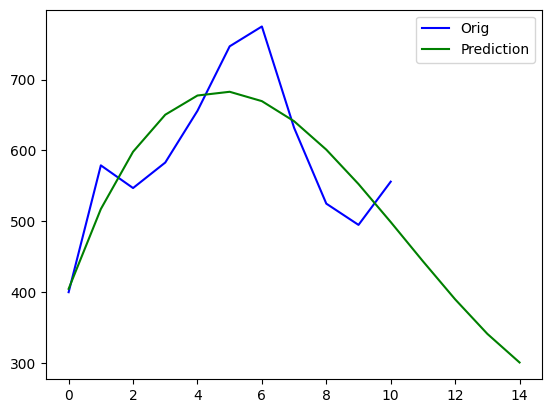

In [16]:
kids_values = data_age['Under 16'].values
# x-axis of 1 to 10
x_axis = range(len(kids_values))
# Polynomial degree
poly_degree = 3
# Generate curve fitting graph
curve_fit = np.polyfit(x_axis, kids_values, poly_degree)
# Generate curve fitting graph values (10 points)
poly_interp = np.poly1d(curve_fit)

poly_fit_values = []

for i in range(len(x_axis)):
    poly_fit_values.append(poly_interp(i))
    
plt.plot(x_axis, kids_values, "-b", label = "Orig")

x_axis2 = range(15)

poly_fit_values = []

for i in range(len(x_axis2)):
    poly_fit_values.append(poly_interp(i))

plt.plot(x_axis2, poly_fit_values, "-g", label = "Prediction")
plt.legend(loc="upper right")
plt.show()